In [1]:
import os
import json
import pgmpy
from pgmpy.readwrite import NETReader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

filedir = os.path.join(os.getcwd())
DATASET_NAME = 'credit10k'
TARGET_COL = 'CreditWorthiness'

MODEL_NET_PATH = os.path.join(filedir, 'models')
ARTIFACTS_PATH = os.path.join(filedir, f'{DATASET_NAME}_artifacts')
DATASET_FILEPATH = os.path.join(filedir, 'data', f'{DATASET_NAME}.csv')
RULES_FILEPATH = os.path.join(filedir, f'rules_{DATASET_NAME}.json')

print(f'filedir: {filedir}')
print(f'DATASET_PATH: {DATASET_FILEPATH}')
print(f'MODEL_NET_PATH: {MODEL_NET_PATH}')
print(f'ARTIFACTS_PATH: {ARTIFACTS_PATH}')
print(f'RULES_PATH: {RULES_FILEPATH}')

filedir: /home/ignacy/cmu/bnc-formal-verification/src/experiments_fall
DATASET_PATH: /home/ignacy/cmu/bnc-formal-verification/src/experiments_fall/data/credit10k.csv
MODEL_NET_PATH: /home/ignacy/cmu/bnc-formal-verification/src/experiments_fall/models
ARTIFACTS_PATH: /home/ignacy/cmu/bnc-formal-verification/src/experiments_fall/credit10k_artifacts
RULES_PATH: /home/ignacy/cmu/bnc-formal-verification/src/experiments_fall/rules_credit10k.json


In [2]:
data = pd.read_csv(DATASET_FILEPATH)
data.head()

,PaymentHistory,WorkHistory,Reliability,Debit,Income,RatioDebInc,Assets,Worth,Profession,FutureIncome,Age,CreditWorthiness
0,Without_Reference,Unstable,Unreliable,a0_11100,s70001_more,Favorable,wealthy,High,Medium_income_profession,Promissing,a16_21,Negative
1,Aceptable,Unjustified_no_work,Unreliable,a0_11100,s70001_more,Favorable,average,High,Medium_income_profession,Promissing,a66_up,Negative
2,Aceptable,Unstable,Reliable,a25901_more,s30001_70000,Unfavorable,wealthy,High,Low_income_profession,Not_promissing,a16_21,Negative
3,Excellent,Unstable,Reliable,a25901_more,s30001_70000,Unfavorable,average,Medium,Medium_income_profession,Not_promissing,a16_21,Negative
4,Excellent,Unjustified_no_work,Unreliable,a11101_25900,s0_30000,Unfavorable,average,Low,Medium_income_profession,Not_promissing,a66_up,Negative


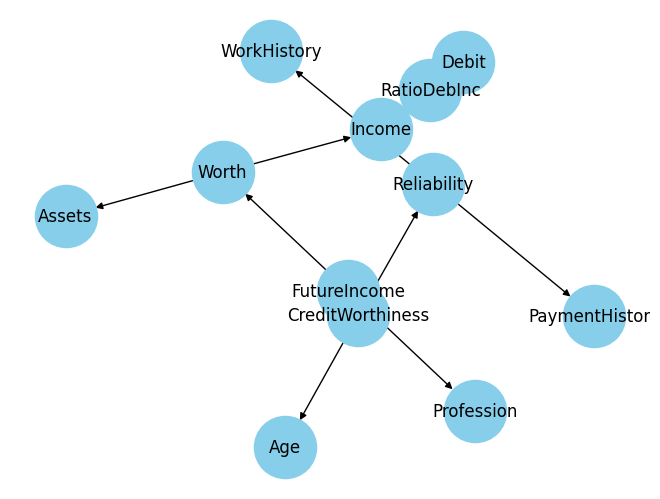

<Figure size 1000x1000 with 0 Axes>

In [3]:
model = NETReader(path=os.path.join(MODEL_NET_PATH, f'{DATASET_NAME}.net')).get_model()

# Plot the model
G = nx.DiGraph()
G.add_edges_from(model.edges())
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue")
plt.figure(figsize=(10, 10))
plt.show()

In [4]:
with open(RULES_FILEPATH) as f:
    rules = json.load(f)
    
print(f'Number of rules: {len(rules)}')

Number of rules: 110


In [5]:
# LOAD ARTIFACTS IFTHEN Artifacts
ifthen_results_dict = {}
with open(os.path.join(ARTIFACTS_PATH, f'ifthen_{DATASET_NAME}.json')) as f:
    ifthen_results_dict = json.load(f)


In [9]:
def transform_mdd_names_back(variable_list: list[str]) -> list[str]:
    transformed_list = []
    variables = {}
    
    for var in variable_list:
        if var.startswith('Node'):
            name = var.split('_')[1]
            index = int(var.split('_')[2])
            
            for var2 in variable_list:
                if var2.startswith(f'x_{index}'):
                    value = int(var2.split('=')[1].split('th')[0])
                    
                    transformed_list.append(f'{name}={value}')
                    break
    
    return transformed_list
    

In [10]:
idx = 65

rule = rules[idx]['rule']
outcome = rules[idx]['class']

result = ifthen_results_dict[f'Verification case #IfThen#{idx}']

print(f'Rule: {rule}')
print(f'Outcome: {outcome}')
print(f'Verification result: {result["is_SAT"]}')
print(f'True variables: {result["true_variables"]}')

Rule: [['FutureIncome', '<=', 0.0], ['Reliability', '<=', 0.0], ['RatioDebInc', '>', 0.0], ['Age', '>', 1.0], ['WorkHistory', '>', 0.0], ['Profession', '<=', 1.0], ['Assets', '>', 1.0], ['Income', '>', 1.0]]
Outcome: 0
Verification result: False
True variables: ['Node_Age_1', 'Node_Reliability_18', 'edge_1_18_(1_2)', 'x_1 = 2th value', 'x_2 = 0th value', 'x_3 = 3th value', 'x_4 = 3th value', 'Node_Worth_6', 'x_5 = 0th value', 'Node_Profession_7', 'edge_6_7_(6_2)', 'x_6 = 2th value', 'Node_Income_8', 'edge_7_8_(7_1)', 'x_7 = 1th value', 'Node_Assets_9', 'edge_8_9_(8_2)', 'x_8 = 2th value', 'Node_RatioDebInc_10', 'edge_9_10_(9_2)', 'x_9 = 2th value', 'Node_Debit_11', 'edge_10_11_(10_1)', 'x_10 = 1th value', 'Node_TRUE_22', 'edge_11_22_(11_2)', 'x_11 = 2th value', 'Node_WorkHistory_19', 'edge_18_19_(18_0)', 'Node_PaymentHistory_20', 'edge_19_20_(19_3)', 'Node_FutureIncome_21', 'edge_20_21_(20_3)', 'edge_21_6_(21_0)']


In [11]:
transform_mdd_names_back(result['true_variables'])

['Age=2',
 'Worth=2',
 'Profession=1',
 'Income=2',
 'Assets=2',
 'RatioDebInc=1',
 'Debit=2']